## Power Outliers

In the original data, there are extreme outliers. Because this trend is not reflected in the grid power consumed, the PV created, or the battery power used, it is presumed that this is because of some external factor - such as sensor readings going beserk.

Starting in the first timestep (746) we will copy all the na and 0 values from the original data over to the new data.

In [ ]:
import pandas as pd
## Read in dirty data
df_dirty = pd.read_parquet("01_preprocess/building_real__all_devices__2023_dirty.parquet")
df_dirty = df_dirty.reset_index(drop=True) # just use a 0-based index
df_clean = pd.read_csv("00_raw/baseline_Building_1.csv")
df_clean = df_clean.reset_index(drop=True)  # just use a 0-based index
df_dirty.head()

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,occupant_count,indoor_dry_bulb_temperature_cooling_set_point,indoor_dry_bulb_temperature_heating_set_point,hvac_mode
0,1,1,6,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
1,1,2,6,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
2,1,3,6,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
3,1,4,6,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
4,1,5,6,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0


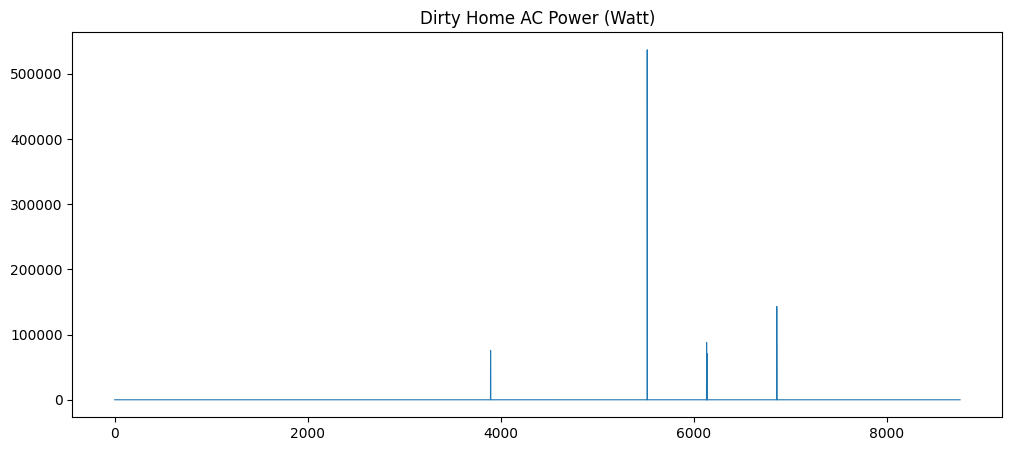

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df_dirty['non_shiftable_load'].fillna(0.0).plot(figsize=(12, 5), linewidth=0.8)
plt.title('Dirty Home AC Power (Watt)')
plt.show()

In [3]:
df_dirty.shape

(8760, 16)

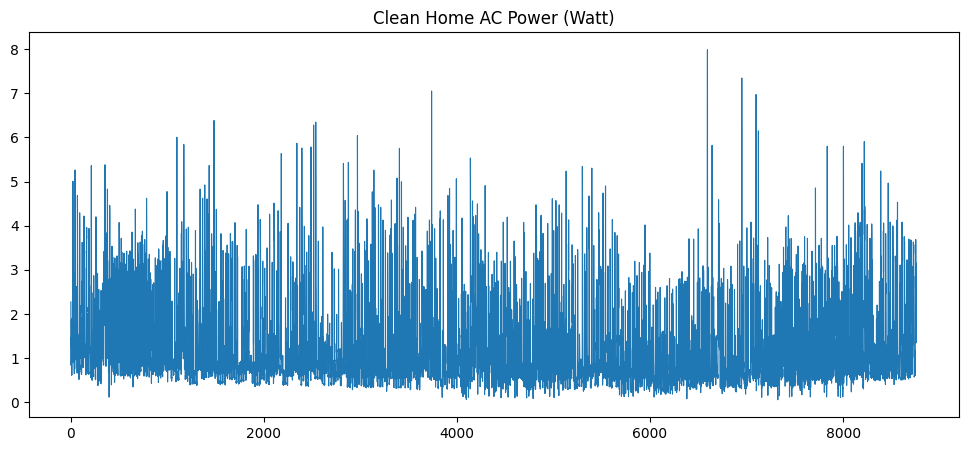

In [4]:
df_clean['non_shiftable_load'].fillna(0.0).plot(figsize=(12, 5), linewidth=0.8)
plt.title('Clean Home AC Power (Watt)')
plt.show()

In [5]:
df_clean.shape

(8760, 12)

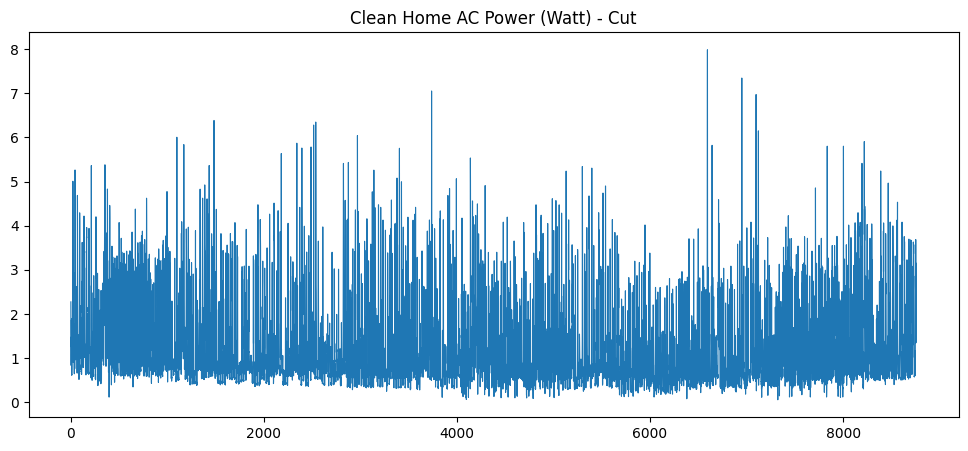

In [6]:
from utils.timestep import Timestep
df_clean_cut = df_clean[Timestep.start_copy:Timestep.end_copy].copy()
df_clean_cut['non_shiftable_load'].fillna(0.0).plot(figsize=(12, 5), linewidth=0.8)
plt.title('Clean Home AC Power (Watt) - Cut')
plt.show()

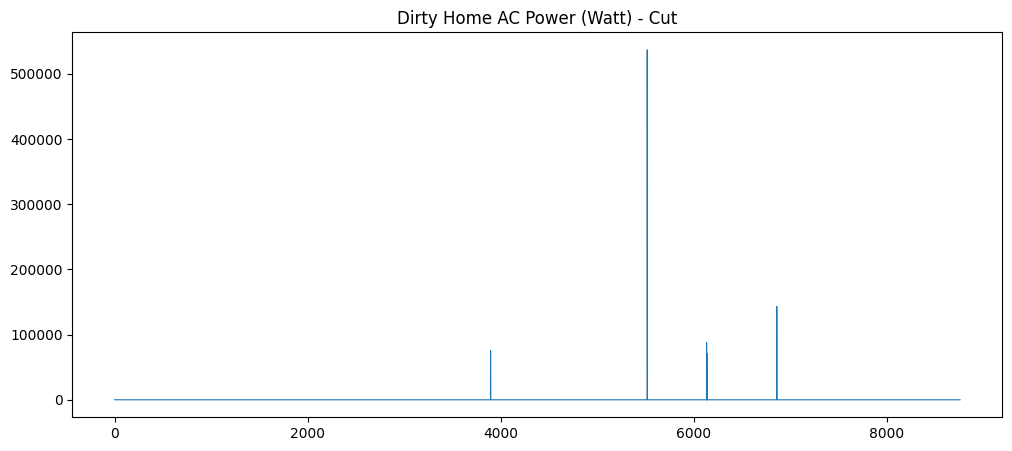

In [7]:
df_dirty_cut = df_dirty[Timestep.start_copy:Timestep.end_copy].copy()

df_dirty_cut['non_shiftable_load'].fillna(0.0).plot(figsize=(12, 5), linewidth=0.8)
plt.title('Dirty Home AC Power (Watt) - Cut')
plt.show()

In [8]:
mask_dirty = df_dirty_cut["non_shiftable_load"] > 100
print("> 100 values", (mask_dirty == True).sum())
print("values with data", (mask_dirty == False).sum())
mask_dirty.head()

> 100 values 6
values with data 8754


0    False
1    False
2    False
3    False
4    False
Name: non_shiftable_load, dtype: bool

In [9]:
df_clean_cut.loc[mask_dirty, ["non_shiftable_load"]] = df_dirty_cut.loc[mask_dirty, ["non_shiftable_load"]]


In [10]:
df_clean_cut[df_clean_cut["non_shiftable_load"] > 100].sum()

month                                            21.000000
hour                                             96.000000
day_type                                         26.000000
daylight_savings_status                           0.000000
indoor_dry_bulb_temperature                       0.000000
average_unmet_cooling_setpoint_difference         0.000000
indoor_relative_humidity                          0.000000
non_shiftable_load                           983868.691000
dhw_demand                                        0.000000
cooling_demand                                    0.000000
heating_demand                                    0.000000
solar_generation                                814.437487
dtype: float64

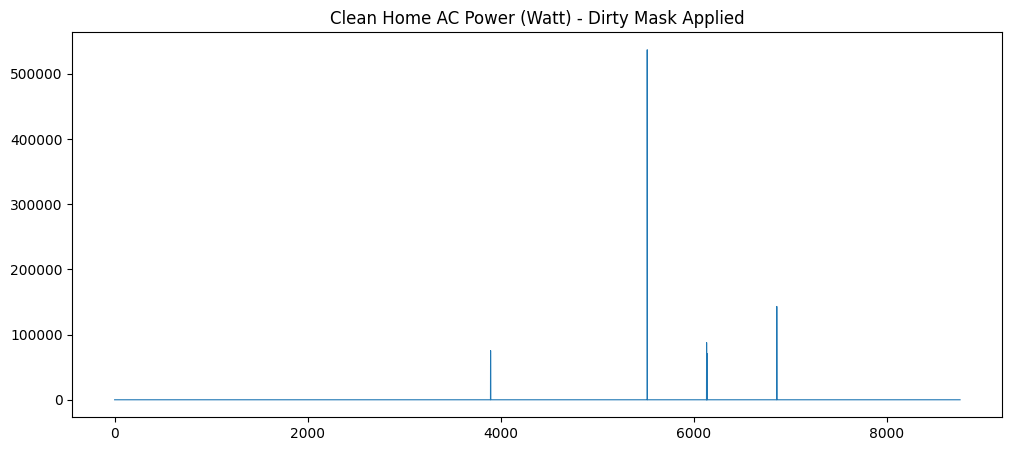

In [11]:
df_clean_cut['non_shiftable_load'].fillna(0.0).plot(figsize=(12, 5), linewidth=0.8)
plt.title('Clean Home AC Power (Watt) - Dirty Mask Applied')
plt.show()

In [12]:
df_clean_cut.fillna(0.0).to_csv("03_clean/Building_01_dirty_02_power_outliers.csv", index=False)